In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

In [2]:
df = pd.read_csv('final.csv')

C:\Users\Grayson\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,10,12,13,14,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             977719 non-null  float64
 1   LEA_x                  975136 non-null  object 
 2   school_ID              975136 non-null  object 
 3   school_num             975136 non-null  object 
 4   school_x               975136 non-null  object 
 5   fund                   975136 non-null  float64
 6   function               975136 non-null  float64
 7   program                975086 non-null  float64
 8   amt                    975136 non-null  float64
 9   year                   975136 non-null  float64
 10  revenue                977719 non-null  object 
 11  LEA_ID                 973287 non-null  float64
 12  LEA_y                  596597 non-null  object 
 13  school_y               596597 non-null  object 
 14  test                   596597 non-

In [4]:
categories = ['year', 'LEA_ID']
for col in categories:
    df[col] = df[col].astype('category')

In [5]:
del df['LEA_y']
del df['school_y']
del df['Unnamed: 0']
df.dropna(axis = 0, how = 'all', inplace = True)

In [6]:
sum(df.duplicated())

75387

In [7]:
for c in df.columns:
    print(str(c) + ": " + str(df[c].isnull().sum() * 100 / len(df[c])))

LEA_x: 0.26418633574677386
school_ID: 0.26418633574677386
school_num: 0.26418633574677386
school_x: 0.26418633574677386
fund: 0.26418633574677386
function: 0.26418633574677386
program: 0.2693002795281671
amt: 0.26418633574677386
year: 0.26418633574677386
revenue: 0.0
LEA_ID: 0.45329997678269524
test: 38.980729637042955
ENGLISH LANGUAGE ARTS: 39.52475097650756
MATHEMATICS: 39.64175801022584
SCIENCE: 39.90645574035076
fund_id: 0.0


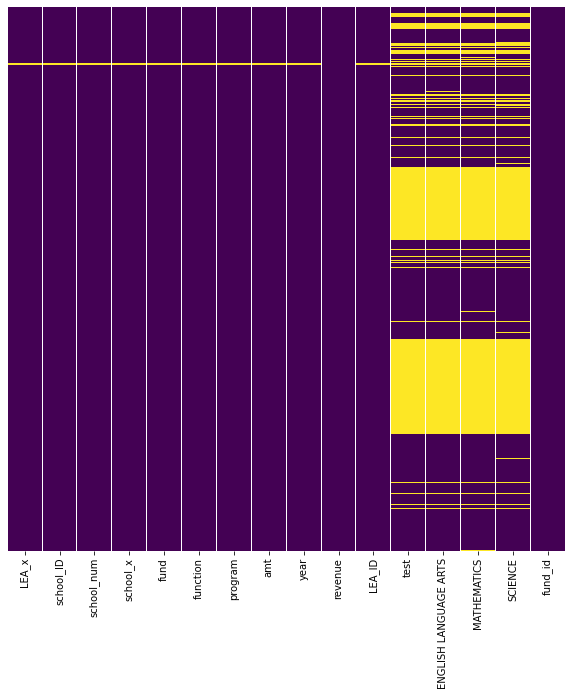

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [9]:
for col in ['year', 'test']:
    print(df[col].value_counts())

2021.0    232176
2019.0    196804
2020.0    188968
2017.0    146753
2018.0    142205
2016.0     68230
Name: year, dtype: int64
RISE    405918
SAGE    190679
Name: test, dtype: int64


In [10]:
print(df.describe().T)

                          count          mean           std           min  \
fund                   975136.0     12.722261  8.518427e+00  1.000000e+01   
function               975136.0   1916.436234  9.221180e+02  1.000000e+03   
program                975086.0   3726.953191  3.077885e+03  0.000000e+00   
amt                    975136.0  89177.923160  1.441044e+06 -1.264530e+08   
ENGLISH LANGUAGE ARTS  591278.0      0.391342  1.322378e-01  6.000000e-02   
MATHEMATICS            590134.0      0.362602  1.547530e-01  5.714290e-02   
SCIENCE                587546.0      0.390761  1.478979e-01  5.769230e-02   

                             25%          50%           75%           max  
fund                     10.0000    10.000000     10.000000  7.600000e+01  
function               1000.0000  2100.000000   2500.000000  6.400000e+03  
program                  50.0000  5331.000000   5805.000000  9.999000e+03  
amt                     514.0900  3840.540000  20648.335000  2.199674e+08  
ENG

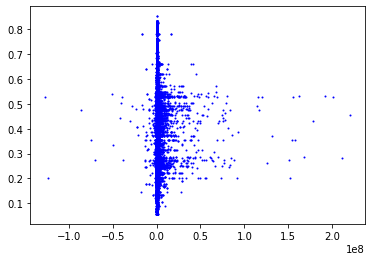

In [11]:
df_rev = df.loc[df['revenue'] == True]
x = np.array(df_rev['amt'])
y = np.array(df_rev['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

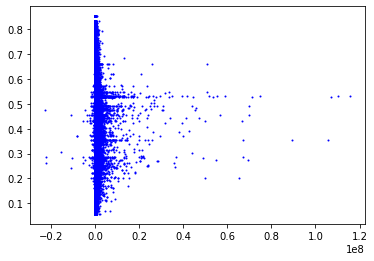

In [12]:
df_exp = df.loc[df['revenue'] == False]
x = np.array(df_exp['amt'])
y = np.array(df_exp['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

In [13]:
df.groupby(['LEA_x', 'year'], as_index=False).size()

,LEA_x,year,size
0,ACADEMY FOR MATH ENGINEERING & SCIENCE,2016.0,398
1,ACADEMY FOR MATH ENGINEERING & SCIENCE,2017.0,364
2,ACADEMY FOR MATH ENGINEERING & SCIENCE,2018.0,188
3,ACADEMY FOR MATH ENGINEERING & SCIENCE,2019.0,384
4,ACADEMY FOR MATH ENGINEERING & SCIENCE,2020.0,182
...,...,...,...
985,WINTER SPORTS SCHOOL,2017.0,111
986,WINTER SPORTS SCHOOL,2018.0,104
987,WINTER SPORTS SCHOOL,2019.0,96
988,WINTER SPORTS SCHOOL,2020.0,94


In [14]:
df_financial = pd.read_csv('financial.csv')

C:\Users\Grayson\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
df_financial = df_financial.groupby(['LEA_ID', 'school_ID', 'year', 'revenue'], as_index=False).size()

In [16]:
df_financial = df_financial.merge(df[['MATHEMATICS', 'SCIENCE', 'ENGLISH LANGUAGE ARTS', 'school_ID', 'year']], how='left', on=['school_ID', 'year'])

In [17]:
df[['MATHEMATICS', 'SCIENCE', 'ENGLISH LANGUAGE ARTS', 'school_ID', 'year']]

,MATHEMATICS,SCIENCE,ENGLISH LANGUAGE ARTS,school_ID,year
0,0.532894,0.555292,0.487232,1,2016.0
1,0.532894,0.555292,0.487232,1,2016.0
2,0.532894,0.555292,0.487232,1,2016.0
3,0.532894,0.555292,0.487232,1,2016.0
4,0.532894,0.555292,0.487232,1,2016.0
...,...,...,...,...,...
977714,NaN,0.634615,0.673077,710,2021.0
977715,NaN,0.634615,0.673077,710,2021.0
977716,NaN,0.634615,0.673077,710,2021.0
977717,NaN,0.634615,0.673077,710,2021.0


In [20]:
df_financial = df_financial.drop_duplicates()

In [21]:
df_financial

,LEA_ID,school_ID,year,revenue,size,MATHEMATICS,SCIENCE,ENGLISH LANGUAGE ARTS
0,-1.0,100,2016,False,63,0.500000,0.590000,0.490000
10,-1.0,100,2016,False,63,0.580000,0.612500,0.530000
34,-1.0,100,2016,False,63,0.080000,NaN,0.160000
46,-1.0,100,2016,False,63,0.411429,0.535000,0.474286
66,-1.0,100,2016,False,63,0.575000,0.600000,0.565000
...,...,...,...,...,...,...,...,...
24422186,186579.0,03M,2021,True,31,0.233696,0.252033,0.252688
24422660,186581.0,04M,2020,False,23,NaN,NaN,NaN
24422685,186581.0,04M,2020,True,2,NaN,NaN,NaN
24422710,186581.0,04M,2021,False,124,0.246667,0.375000,0.335526


In [22]:
df_financial = df_financial[df_financial['LEA_ID'] != -1.0]
df_financial

,LEA_ID,school_ID,year,revenue,size,MATHEMATICS,SCIENCE,ENGLISH LANGUAGE ARTS
286388,122.0,1,2016,False,816,0.532894,0.555292,0.487232
287335,122.0,1,2016,True,131,0.532894,0.555292,0.487232
288282,122.0,1,2017,False,821,0.529265,0.544174,0.501423
289241,122.0,1,2017,True,138,0.529265,0.544174,0.501423
290200,122.0,1,2018,False,839,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
24422186,186579.0,03M,2021,True,31,0.233696,0.252033,0.252688
24422660,186581.0,04M,2020,False,23,NaN,NaN,NaN
24422685,186581.0,04M,2020,True,2,NaN,NaN,NaN
24422710,186581.0,04M,2021,False,124,0.246667,0.375000,0.335526


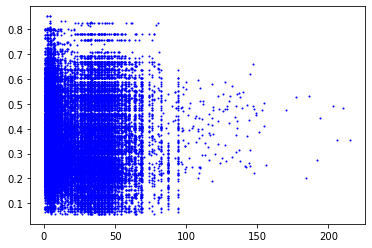

In [28]:
df_financial_rev = df_financial.loc[df_financial['revenue'] == True]
df_financial_exp = df_financial.loc[df_financial['revenue'] == False]
x = np.array(df_financial_rev['size'])
y = np.array(df_financial_rev['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

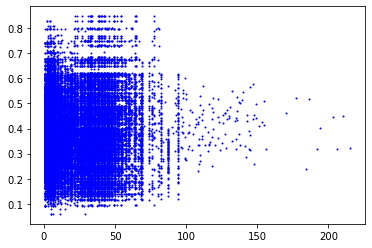

In [25]:
x = np.array(df_financial_rev['size'])
y = np.array(df_financial_rev['ENGLISH LANGUAGE ARTS'])
plt.scatter(x, y, s=1, c='b')

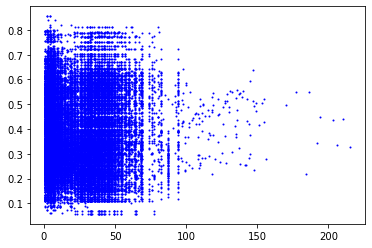

In [26]:
x = np.array(df_financial_rev['size'])
y = np.array(df_financial_rev['SCIENCE'])
plt.scatter(x, y, s=1, c='b')

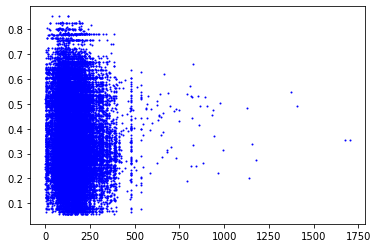

In [30]:
x = np.array(df_financial_exp['size'])
y = np.array(df_financial_exp['MATHEMATICS'])
plt.scatter(x, y, s=1, c='b')

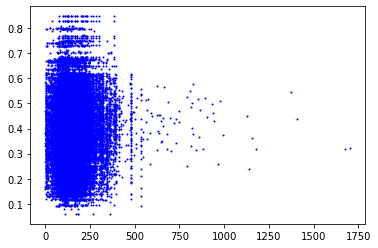

In [29]:
x = np.array(df_financial_exp['size'])
y = np.array(df_financial_exp['ENGLISH LANGUAGE ARTS'])
plt.scatter(x, y, s=1, c='b')

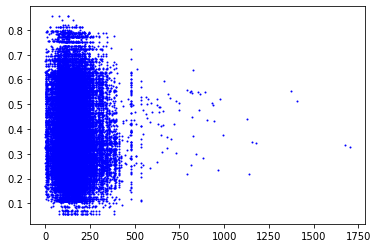

In [31]:
x = np.array(df_financial_exp['size'])
y = np.array(df_financial_exp['SCIENCE'])
plt.scatter(x, y, s=1, c='b')